**STEPS**
1. Define the grid and randomly assign safety values to each individual cell.
2. Group individuals into zones.
3. Assign a safety value to each zone based any individual safety values within the zone.
4. Find the safest path from a desingated start to an end point.

**Safety Values: 0 most dangerous - 10 safest**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import heapq
from matplotlib.colors import LinearSegmentedColormap

def generate_grid(n, m):
    grid = np.full((n, m), -1)
    for i in range(n):
        for j in range(m):
            if np.random.rand() <= 0.4:  # 40% chance with safety value, 60% unassigned/impassable (-1)
                grid[i, j] = np.random.randint(0, 11)
    return grid

def assign_zone_safety_values(grid, zone_size):
    # number of zones = grid-size / zone-sizes
    zone_values = np.zeros((grid.shape[0] // zone_size[0], grid.shape[1] // zone_size[1]))

    # for all rows
    for i in range(zone_values.shape[0]):
        # for all columns
        for j in range(zone_values.shape[1]):
            sub_grid = grid[i * zone_size[0]:(i + 1) * zone_size[0], j * zone_size[1]:(j + 1) * zone_size[1]]
            # mean safety value in the zone
            zone_values[i, j] = np.mean(sub_grid)
    return zone_values

def find_nearest_very_safe_zone(grid, start, safety_threshold):
    # all zones (coordinates) with safety value >= threshold
    locations = np.where(grid >= safety_threshold)

    # for the all 'very safe zones' identified
    if locations[0].size > 0:
        # calculate distance from start to each 'very safe zone'
        distances = np.abs(locations[0] - start[0]) + np.abs(locations[1] - start[1])
        # select the zone with minimum distance
        min_index = np.argmin(distances)
        return (locations[0][min_index], locations[1][min_index])
    return None

# priority queue to discover paths with highest safety levels
def find_paths(grid, start, goal):

    # empty path if no goal is set
    if goal is None:
        return []

    # movement directions
    neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0)]

    # PRIORITY QUEUE
    # initial cost, (starting position of grid), [list of paths taken so far], accumulated path cost
    pq = [(0, start, [start], 0)]
    visited = set() # set to keep track of visted nodes
    paths = [] # list to collect different paths

    # until pq is empty
    while pq:
        # pop the element with lowest cost (higher) = safer region
        cost, (x, y), path, path_cost = heapq.heappop(pq)

        if (x, y) in visited:
            continue
        visited.add((x, y)) # mark current node visited

        if (x, y) == goal:
            paths.append((path, path_cost))

            # stop after finding two paths
            if len(paths) == 2:
                break
            continue

        # explore neighboring nodes
        for dx, dy in neighbors:
            nx, ny = x + dx, y + dy

            # ensure the new node is within grid boundaries
            if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1] and grid[nx, ny] != -1:

                if (nx, ny) not in visited:
                    # cost of path inversely calculated
                      # ex) safety value 10: gives 10 - 10 = 0 cost
                    new_cost = 10 - grid[nx, ny]

                    # push the new node into pq to update cost & path
                    heapq.heappush(pq, (path_cost + new_cost, (nx, ny), path + [(nx, ny)], path_cost + new_cost))

    return paths


def visualize_grid(grid, start, goal, paths):
    colors = ["white", "red", "orange", "yellow", "yellowgreen", "green"]
    cmap = LinearSegmentedColormap.from_list("custom", colors, N=12)

    # normalize to map the grid values (-1 to 10) to the colormap indices
    norm = plt.Normalize(-1, 10)

    fig, ax = plt.subplots()
    cax = ax.imshow(grid, cmap=cmap, norm=norm)
    plt.colorbar(cax, ticks=np.arange(-1, 11))

    if paths:
        for path, cost in paths:
            y, x = zip(*path)
            ax.plot(x, y, marker='o')

    ax.plot(start[1], start[0], 'ko', markersize=10, label='Start')
    if goal:
        ax.plot(goal[1], goal[0], 'bo', markersize=10, label='Destination')

    ax.legend()
    plt.show()

In [ ]:
n, m = 40, 40  # grid dimensions
zone_size = (2, 2)  # zone size

Enter your start row (0 to 19): 9
Enter your start column (0 to 19): 13


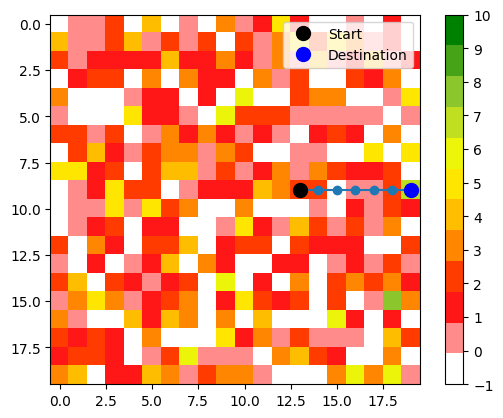

The shortest safest path to the GREEN ZONE is: [(9, 13), (9, 14), (9, 15), (9, 16), (9, 17), (9, 18), (9, 19)]


In [ ]:
# make grid
grid = generate_grid(n, m)
zone_grid = assign_zone_safety_values(grid, zone_size)

# start location
start_row = int(input("Enter your start row (0 to {}): ".format(zone_grid.shape[0] - 1)))
start_col = int(input("Enter your start column (0 to {}): ".format(zone_grid.shape[1] - 1)))
start = (start_row, start_col)

# find shorest paths
goal = find_nearest_very_safe_zone(zone_grid, start, 6)  # find nearest green zone (with threshold)
paths = find_paths(zone_grid, start, goal) # find paths
visualize_grid(zone_grid, start, goal, paths) # visualize grid

if paths:
    paths.sort(key=lambda x: len(x[0]))
    shortest_path, shortest_path_cost = paths[0]
    print("The shortest safest path to the GREEN ZONE is:", shortest_path)
else:
    print("No safe path to the very safe zone could be found.")